In [124]:
import pandas as pd
import numpy as np

In [125]:
df = pd.read_csv('datasets/data_tr_city.csv')

In [126]:
df

,datetime,구미 혁신도시배수지 유출유량 적산차
0,2017-01-01 01:00:00,138.0
1,2017-01-01 02:00:00,237.0
2,2017-01-01 03:00:00,128.0
3,2017-01-01 04:00:00,14.0
4,2017-01-01 05:00:00,11.0
...,...,...
35058,2020-12-31 19:00:00,328.0
35059,2020-12-31 20:00:00,347.0
35060,2020-12-31 21:00:00,335.0
35061,2020-12-31 22:00:00,141.0


In [127]:
X = df[['구미 혁신도시배수지 유출유량 적산차']].to_numpy()

In [128]:
years = [2017,2018,2019,2020]

In [129]:
df

,datetime,구미 혁신도시배수지 유출유량 적산차
0,2017-01-01 01:00:00,138.0
1,2017-01-01 02:00:00,237.0
2,2017-01-01 03:00:00,128.0
3,2017-01-01 04:00:00,14.0
4,2017-01-01 05:00:00,11.0
...,...,...
35058,2020-12-31 19:00:00,328.0
35059,2020-12-31 20:00:00,347.0
35060,2020-12-31 21:00:00,335.0
35061,2020-12-31 22:00:00,141.0


In [130]:
df.columns

Index(['datetime', '구미 혁신도시배수지 유출유량 적산차'], dtype='object')

In [131]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35063 entries, 0 to 35062
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   datetime             35063 non-null  datetime64[ns]
 1   구미 혁신도시배수지 유출유량 적산차  35055 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 548.0 KB


In [133]:
df['year'] = pd.DatetimeIndex(df['datetime']).year
df['month'] = pd.DatetimeIndex(df['datetime']).month

In [134]:
df

,datetime,구미 혁신도시배수지 유출유량 적산차,year,month
0,2017-01-01 01:00:00,138.0,2017,1
1,2017-01-01 02:00:00,237.0,2017,1
2,2017-01-01 03:00:00,128.0,2017,1
3,2017-01-01 04:00:00,14.0,2017,1
4,2017-01-01 05:00:00,11.0,2017,1
...,...,...,...,...
35058,2020-12-31 19:00:00,328.0,2020,12
35059,2020-12-31 20:00:00,347.0,2020,12
35060,2020-12-31 21:00:00,335.0,2020,12
35061,2020-12-31 22:00:00,141.0,2020,12


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35063 entries, 0 to 35062
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   datetime             35063 non-null  datetime64[ns]
 1   구미 혁신도시배수지 유출유량 적산차  35055 non-null  float64       
 2   year                 35063 non-null  int64         
 3   month                35063 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 1.1 MB


데이터 전처리

In [136]:
df = df.dropna()

In [137]:
df['구미 혁신도시배수지 유출유량 적산차'].describe()

count    3.505500e+04
mean     1.236927e+02
std      4.342471e+04
min     -6.093821e+06
25%      1.030000e+02
50%      2.170000e+02
75%      3.460000e+02
max      4.720655e+06
Name: 구미 혁신도시배수지 유출유량 적산차, dtype: float64

In [138]:
q1=df['구미 혁신도시배수지 유출유량 적산차'].quantile(0.25)
q2=df['구미 혁신도시배수지 유출유량 적산차'].quantile(0.5)
q3=df['구미 혁신도시배수지 유출유량 적산차'].quantile(0.75)

In [139]:
iqr = q3-q1

In [140]:
q3+3.0*iqr

1075.0

In [141]:
remove = df['구미 혁신도시배수지 유출유량 적산차']>q3+1.5*iqr

In [142]:
removedata = df[remove].index

In [143]:
removedata

Int64Index([ 1784,  2846,  2866,  3224,  3431,  3468,  3485,  3491,  3513,
             3533,
            ...
            33187, 33309, 33427, 33594, 33861, 33883, 34316, 34484, 34556,
            34790],
           dtype='int64', length=140)

In [144]:
df.drop(removedata,inplace=True)

C:\Users\ParkJeongSu\AppData\Local\Temp\ipykernel_5884\2046731219.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(removedata,inplace=True)


In [146]:
df[df['구미 혁신도시배수지 유출유량 적산차']<0] = 0

C:\Users\ParkJeongSu\AppData\Local\Temp\ipykernel_5884\649486699.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['구미 혁신도시배수지 유출유량 적산차']<0] = 0


In [151]:
historymonth = []
for i in years:
    print(i,'년')
    dummy = df[df['year'] == i]
    print(f'{i}년 평균',np.mean(dummy[['구미 혁신도시배수지 유출유량 적산차']].to_numpy()))

    for j in range(1,13):
        filter = dummy[dummy['month'] == j]
        monthAvg = np.mean(filter[['구미 혁신도시배수지 유출유량 적산차']].to_numpy())
        print(f'{j}월 :',monthAvg)
        historymonth.append(monthAvg)
        str(years)
    print()
    

2017 년
2017년 평균 205.08503989922124
1월 : 174.48183041722746
2월 : 183.9047619047619
3월 : 190.05864121621622
4월 : 190.0935569637883
5월 : 181.02735978112176
6월 : 249.5263888888889
7월 : 230.4655870445344
8월 : 223.91386271870795
9월 : 211.65083798882682
10월 : 203.9247311827957
11월 : 212.94722222222222
12월 : 207.97177419354838

2018 년
2018년 평균 233.67706785837058
1월 : 208.91666666666666
2월 : 210.82579195230997
3월 : 214.733153638814
4월 : 221.12395543175487
5월 : 225.40079340511443
6월 : 242.13146853146853
7월 : 273.3673536054422
8월 : 284.99050203527815
9월 : 228.66806136680614
10월 : 228.32479784366578
11월 : 235.04843111111114
12월 : 228.98519515477793

2019 년
2019년 평균 246.26653519303468
1월 : 229.349932705249
2월 : 227.28403233979134
3월 : 237.26110363391655
4월 : 242.89568845618916
5월 : 251.47503373819163
6월 : 253.7810320781032
7월 : 264.7044534412955
8월 : 264.70121130551814
9월 : 244.4013986013986
10월 : 242.6972972972973
11월 : 247.28969359331475
12월 : 247.6951219512195

2020 년
2020년 평균 251.163832504298
1

In [152]:
import matplotlib.pyplot as plt

In [157]:
water2017 = historymonth[:12]
water2018 = historymonth[12:24]
water2019 = historymonth[24:36]
water2020 = historymonth[36:]

In [158]:
len(water2017),len(water2018),len(water2019),len(water2020)

(12, 12, 12, 12)

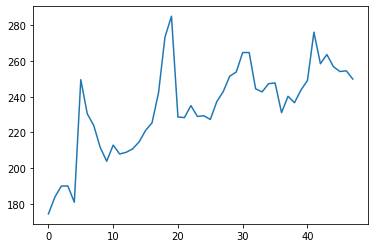

In [155]:
plt.plot(range(len(historymonth)),historymonth)

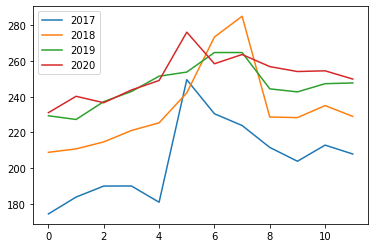

In [161]:
plt.plot(range(12),water2017,label='2017')
plt.plot(range(12),water2018,label='2018')
plt.plot(range(12),water2019,label='2019')
plt.plot(range(12),water2020,label='2020')
plt.legend()